В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
medical_df = pd.read_csv(r'D:\ml_course\Модуль 2. Навчання з учителем\dataframes\medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [2]:
def normal_equations(X,y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [3]:
X = non_smoker_df['age'].to_numpy()
y = non_smoker_df['charges'].to_numpy()
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
mnk_coef = normal_equations(X_with_intercept, y)
intercept = mnk_coef[0]
slope = mnk_coef[1]
print(f"Intercept (b): {intercept:.2f}")
print(f"Slope (w для age): {slope:.2f}")
predictions_MNK = np.dot(X_with_intercept, mnk_coef)
rmse_mnk = np.sqrt(np.mean((y - predictions_MNK)**2))
print(f"RMSE МНК: {rmse_mnk:.2f}")

Intercept (b): -2091.42
Slope (w для age): 267.25
RMSE МНК: 4662.51


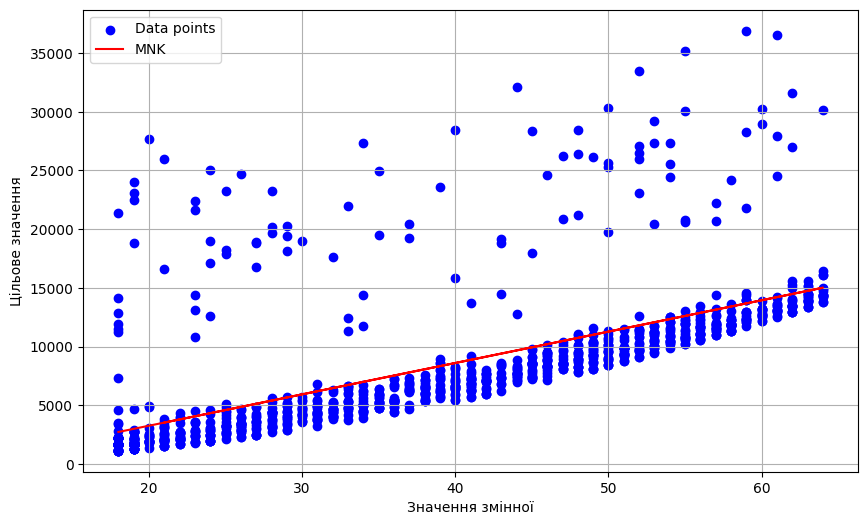

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
def full_batch_gradient_descent(X, y, lr=0.00001, epochs=5000):
    theta = np.zeros(X.shape[1])
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = np.dot(X, theta)
        error = y_pred - y
        errors.append(np.mean(error**2))
        gradient = (2/n) * np.dot(X.T, error)
        theta -= lr * gradient

    return theta, errors


Навчання з lr = 0.0001
m = 225.1004, b = -219.4486, RMSE = 4704.88

Навчання з lr = 1e-05
m = 220.5792, b = -18.6460, RMSE = 4714.41

Навчання з lr = 1e-06
m = 220.1012, b = 2.5824, RMSE = 4715.47


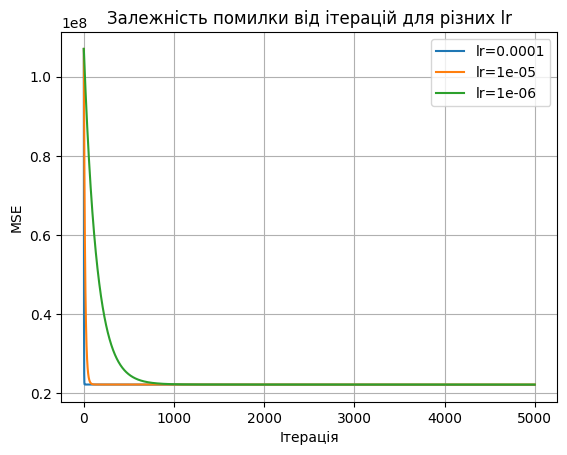

In [6]:
learning_rates = [0.0001, 0.00001, 0.000001]
n = len(y)
X_age = np.c_[np.ones(n), X]
results = {}
for lr in learning_rates:
    print(f"\nНавчання з lr = {lr}")
    theta, errors = full_batch_gradient_descent(X_age, y, lr=lr, epochs=5000)
    b = theta[0]
    m = theta[1]
    results[lr] = (m, b, errors)
    predictions = np.dot(X_age, theta)
    rmse = np.sqrt(np.mean((y - predictions)**2))
    print(f"m = {m:.4f}, b = {b:.4f}, RMSE = {rmse:.2f}")
    plt.plot(errors, label=f'lr={lr}')
    
plt.xlabel('Ітерація')
plt.ylabel('MSE')
plt.title('Залежність помилки від ітерацій для різних lr')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
best_lr = 0.0001 # Найменший RMSE = 4704.88
best_m = results[best_lr][0]
best_b = results[best_lr][1]
predictions_GD = best_m * X + best_b

In [8]:
X_df = non_smoker_df['age'].to_frame()
y = non_smoker_df['charges']
lin_reg = LinearRegression()
lin_reg.fit(X_df, y)
print("Intercept (b):", lin_reg.intercept_)
print("Slope (w для age):", lin_reg.coef_[0])  
predictions_sklearn = lin_reg.predict(X_df)
rmse_sklearn = np.sqrt(np.mean((y - predictions_sklearn)**2))
print(f"RMSE sklearn: {rmse_sklearn:.2f}")

Intercept (b): -2091.4205565650864
Slope (w для age): 267.2489128311997
RMSE sklearn: 4662.51


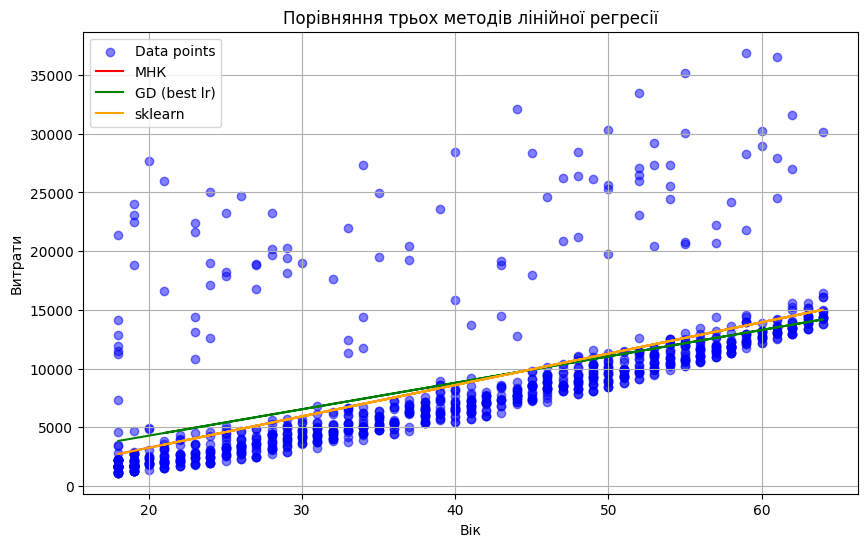

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
plt.plot(X, predictions_MNK, color='red', label='МНК')
plt.plot(X, predictions_GD, color='green', label='GD (best lr)')
plt.plot(X, predictions_sklearn, color='orange', label='sklearn')
plt.xlabel('Вік')
plt.ylabel('Витрати')
plt.title('Порівняння трьох методів лінійної регресії')
plt.legend()
plt.grid(True)
plt.show()

### Висновк
МНК і sklearn дають однакові коефіцієнти та RMSE і це очікувано, бо обидва використовують один і той метод. Градієнтний спуск також сходиться до тих самих параметрів за умови правильно підібраного learning rate. Параметри МНК і sklearn близькі до реальних залежностей - старші люди платять більше за медичні послуги.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [16]:
smoker_df = medical_df[medical_df.smoker == 'yes']
X_smoker = smoker_df['age'].to_frame()
y_smoker = smoker_df['charges']
lin_reg = LinearRegression()
lin_reg.fit(X_smoker, y_smoker)
print("Intercept (b):", lin_reg.intercept_)
print("Slope (w для age):", lin_reg.coef_[0])  
predictions_smoker = lin_reg.predict(X_smoker)
rmse_smoker = np.sqrt(np.mean((y_smoker - predictions_smoker)**2))
print(f"RMSE sklearn: {rmse_smoker:.2f}")

Intercept (b): 20294.12812691597
Slope (w для age): 305.23760210982874
RMSE sklearn: 10711.00


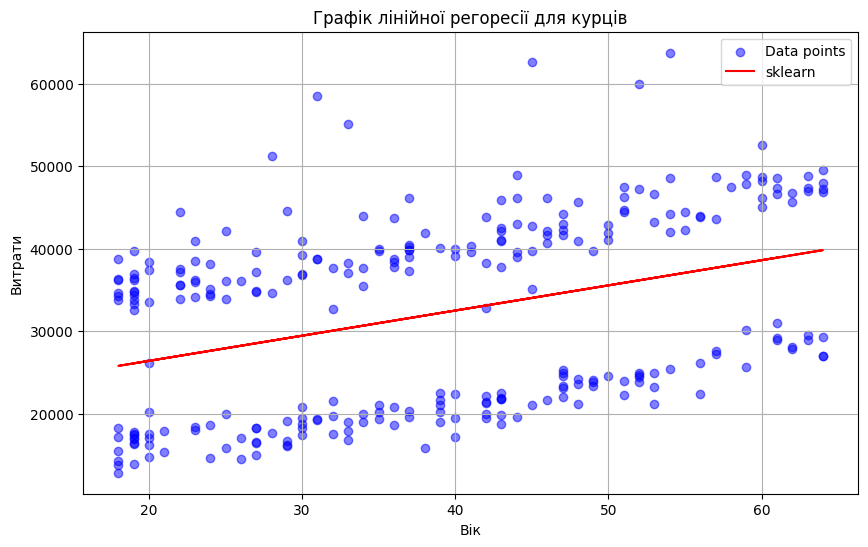

In [169]:
plt.figure(figsize=(10, 6))
plt.scatter(X_smoker, y_smoker, color='blue', alpha=0.5, label='Data points')
plt.plot(X_smoker, predictions_smoker, color='red', label='sklearn')
plt.xlabel('Вік')
plt.ylabel('Витрати')
plt.title('Графік лінійної регоресії для курців')
plt.legend()
plt.grid(True)
plt.show()

### Висновок
Модель лінійної регресії для курців показує, що з віком витрати на медицину зростають. Але RMSE дуже великий 10711 — це означає, що прогноз помиляється на велику суму. Модель погана, бо вік пояснює тільки малу частину витрат. Я б не використовував цю модель в компанії — вона занадто неточна. Краще додати більше ознак і зробити сильнішу модель. Порівняно з некурцями: у некурців модель по віку працює набагато краще (помилка менша). 